In [283]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering  Data

In [284]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Now we will download image-predictions.tsv and save it to "Download" Folder 

In [285]:
folder_name = 'Download'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

<Response [200]>


In [286]:
img_predictions = pd.read_csv('Download/image-predictions.tsv',sep ='\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [287]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

and now i will use tweepy to get missing information like "retweets count" and " likes counts" and then i will save them to a file with the tweet id in order to join them later with the rest of the dataframes .

In [288]:
consumer_key = '#################'
consumer_secret = '######################'
access_token = '#####################################'
access_secret = '##########################'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify = True, parser=tweepy.parsers.JSONParser())

In [210]:
id_of_tweet = twitter_archive['tweet_id'].tolist()
id_of_tweet

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [211]:
tweet1 = api.get_status(889638837579907072)
tweet1

{'created_at': 'Tue Jul 25 00:10:02 +0000 2017',
 'id': 889638837579907072,
 'id_str': '889638837579907072',
 'text': "This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 889638825424826374,
    'id_str': '889638825424826374',
    'indices': [92, 115],
    'media_url': 'http://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg',
    'url': 'https://t.co/f8dEDcrKSR',
    'display_url': 'pic.twitter.com/f8dEDcrKSR',
    'expanded_url': 'https://twitter.com/dog_rates/status/889638837579907072/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 510, 'h': 680, 'resize': 'fit'},
     'medium': {'w': 901, 'h': 1200, 'resize': 'fit'},
     'large': {'w': 1201, 'h': 1600, 'resize': 'fi

In [212]:
tweet1['id_str'],tweet1['favorite_count'],tweet1['retweet_count']

('889638837579907072', 26419, 4383)

In [213]:
testlist = [892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856]
testlist

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856]

To make sure everting is ok we will try in a small list of tweet ids then we will do the full list beacuse it takes a lot of time to complete.

In [ ]:
for ids in testlist:
    try:
        # 
        tweet = api.get_status(ids,wait_on_rate_limit=True,wait_on_rate_limit_notify = True)
        # Y
        print_rows = print(tweet['id_str'],',',tweet['favorite_count'],',',tweet['retweet_count'],file=open("test.txt", "a"))

    except Exception as e:
        print(str(print_rows) + str(e))

In [214]:
import csv
test = pd.read_csv('test.txt',sep = ',')
test

,892420643555336193,37768,8229
0,892177421306343426,32448,6080
1,891815181378084864,24434,4023
2,891689557279858688,41105,8383
3,891327558926688256,39309,9084
4,891087950875897856,19769,3010
5,890971913173991426,11555,1991
6,890729181411237888,63712,18284
7,890609185150312448,27156,4138
8,890240255349198849,31143,7150
9,890006608113172480,29938,7109


everything looks okay from the test list

In [ ]:
for ids in id_of_tweet:
    try:
        # 
        tweet = api.get_status(ids,wait_on_rate_limit=True,wait_on_rate_limit_notify = True)
        # Y
        print_rows = print(tweet['id_str'],',',tweet['favorite_count'],',',tweet['retweet_count'],file=open("tweet_json.txt", "a"))

    except Exception as e:
        print(str(print_rows) + str(e))

In [215]:
tweet_json_output = pd.read_csv('tweet_json.txt',sep = ',')
tweet_json_output.head()

,892420643555336193,37768,8229
0,892177421306343426,32448,6080
1,891815181378084864,24434,4023
2,891689557279858688,41105,8383
3,891327558926688256,39309,9084
4,891087950875897856,19768,3013


In [216]:
tweet_json_df = pd.read_csv('tweet_json.txt', sep=',', 
                  names = ["id_str", "favorite_count", "retweet_count"])

In [217]:
tweet_json_df.head()

,id_str,favorite_count,retweet_count
0,892420643555336193,37768,8229
1,892177421306343426,32448,6080
2,891815181378084864,24434,4023
3,891689557279858688,41105,8383
4,891327558926688256,39309,9084


## Assessing Data

In [218]:
twitter_archive.head(150)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [219]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [220]:
twitter_archive.duplicated().count()

2356

In [221]:
twitter_archive['rating_numerator'].max(),twitter_archive['rating_denominator'].min(),twitter_archive['rating_denominator'].max()

(1776, 0, 170)

In [222]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [223]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [224]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Buddy           7
Bailey          7
an              7
Daisy           7
Toby            7
Oscar           6
Jax             6
Jack            6
Scout           6
Rusty           6
Koda            6
Dave            6
Stanley         6
Milo            6
Leo             6
Bella           6
Finn            5
             ... 
Mairi           1
Dug             1
Snickers        1
Anna            1
Mutt            1
officially      1
Obie            1
Coleman         1
Zeek            1
Rose            1
Hazel           1
Reptar          1
Noosh           1
Terrenth        1
Al              1
Eevee           1
Hall            1
Lili            1
Rupert          1
Rorie           1
Godi            1
Sunshine        1
Bertson         1
Willow          1
Tassy     

In [225]:
img_predictions.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [226]:
img_predictions.duplicated().sum()

0

In [227]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [228]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id_str            2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


#### Quality
##### `twitter_archive` table
- tweet_id column needs to be a string not int.                    
- timestamp column needs to be a datetime object and we remove the 0000 part from it .
- rating_denominator column need to be equal to 10 in all rows .
- rating_numerator column contains some outliers that we should take them into consideration while analyzing the data .
- name column have missing names and some names are wrong like "Such","a","old,"an","very".
- we need to extract the part between "><" in the source to get the actual source

##### `img_predictions` table
- the img_prediction table contains only 2075 so there is missing data .
- tweet_id needs to be a string.
- we will capitalize and remove "_" from the dogs breeds in these columns P1,P2,P3 .

##### `tweet_json_df` table
-id_str column needs to a string.


#### Tidiness
##### `twitter_archive` table
- retweeted_status_id retweeted_status_user_id and retweeted_status_timestamp columns will be dropped from the dataframe. 
- doggo,floofer,pupper and puppo columns will be converted to one column named "DoggoLingo"

##### All  tables will be merged into one final table for analysis.

## Clean

In [229]:
tweet_json_clean = tweet_json_df.copy()
img_predictions_clean = img_predictions.copy()
twitter_archive_clean = twitter_archive.copy()

#### `tweet_json`: id_str column needs to a string.

##### Define
convert the `id_str` column to string using "astype string"

##### Code

In [230]:
tweet_json_clean['id_str'] = tweet_json_clean['id_str'].astype(str)

##### Test

In [231]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id_str            2339 non-null object
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### `twitter_archive`: tweet_id column needs to a string.

##### Define
convert the `tweet_id` column to string using "astype string"

##### Code

In [232]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

##### Test

In [233]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o


#### `twitter_archive`: timestamp column needs to be a datetime object and we remove the 0000 part from it.


##### Define
convert the 'timestamp' column column to datetime object using "to datetime "

##### Code

In [234]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [235]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### `twitter_archive`:  - rating_denominator column need to be equal to 10 in all rows .


##### Define
replace the  values in `rating_denominator` column to 10 using df.loc

In [236]:
twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] != 10, 'rating_denominator'] = 10

##### Test

In [237]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### `twitter_archive`:  -name column have missing names and some sames are wrong like "Such","a","old,"an","very".


##### Define
replace the names in `name` column like "Such","a","old,"an","very" to None using .replace

In [238]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(['a', 'A','old','an','very','the'], 'None')

##### Test

In [239]:
twitter_archive_clean['name'].value_counts()

None        821
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Daisy         7
Buddy         7
Bailey        7
Toby          7
Jax           6
Oscar         6
Koda          6
Stanley       6
Leo           6
Rusty         6
Jack          6
Dave          6
Bella         6
Milo          6
Scout         6
Larry         5
Gus           5
Alfie         5
George        5
           ... 
Shadoe        1
Mairi         1
Dug           1
Snickers      1
Anna          1
Obie          1
Jessiga       1
Pawnd         1
Hall          1
Mookie        1
Snoop         1
Rose          1
Hazel         1
Reptar        1
Noosh         1
Terrenth      1
Al            1
Eevee         1
Lili          1
Laika         1
Zeek          1
Rupert        1
Godi          1
Sunshine      1
Bertson       1
Willow        1
Tassy         1
Wafer         1
Sprout        1
Daniel        1
Name: name, Length: 952,

#### `twitter_archive`:  - extract the part between "><" in the source to get the actual source.


##### Define
extracting the string between ">" and "<" using str.extract

##### Code

In [240]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('((?<=>)[^<:]+(?=:?<))', expand=True)

##### Test

In [241]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### `img_predictions`:  - tweet_id needs to be a string.


##### Define
convert the `tweet_id` column to string using "astype string"

##### Code

In [242]:
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype(str)

##### Test

In [243]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### `img_predictions`:  - capitalize and remove "_" from the dogs breeds in these columns P1,P2,P3 .


##### Define
capitalizeing and remove "_" from the dogs breeds in these columns P1,P2,P3 using Series.str.title and removing "_" using .str.replace

In [244]:
img_predictions_clean['p1'] = img_predictions_clean['p1'].str.title()
img_predictions_clean['p2'] = img_predictions_clean['p2'].str.title()
img_predictions_clean['p3'] = img_predictions_clean['p3'].str.title()
img_predictions_clean['p1'] = img_predictions_clean['p1'].str.replace('_',' ')
img_predictions_clean['p2'] = img_predictions_clean['p2'].str.replace('_',' ')
img_predictions_clean['p3'] = img_predictions_clean['p3'].str.replace('_',' ')

##### Test

In [245]:
img_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### `twitter_archive`:  - retweeted_status_id retweeted_status_user_id , retweeted_status_timestamp , in_reply_to_status_id  and in_reply_to_user_id   columns will be dropped from the dataframe. 


##### Define
Dropping retweeted_status_id retweeted_status_user_id and retweeted_status_timestamp columns using df.drop.

##### Code

In [246]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

##### Test

In [247]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


#### `twitter_archive`:  - doggo,floofer,pupper and puppo columns will be converted to one column named "DoggoLingo"


##### Define
Combining doggo,floofer,pupper and puppo columns into one colum "DoggoLingo" using the .map(str) and then joining them with the .apply method beside we will olny keep unique values then we will remove doggo,floofer,pupper and puppo columns .

##### Code

In [248]:
twitter_archive_clean["DoggoLingo"] = twitter_archive_clean["doggo"].map(str)+ ' ' + twitter_archive_clean["floofer"].map(str)+ ' ' +twitter_archive_clean["pupper"].map(str)+ ' ' +  twitter_archive_clean["puppo"].map(str)+ ' '
twitter_archive_clean["DoggoLingo"] = twitter_archive_clean["DoggoLingo"].apply(lambda x: ' '.join(pd.unique(x.split())))

In [249]:
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.title()

In [250]:
twitter_archive_clean['DoggoLingo'].value_counts()

None                  1976
None Pupper            245
Doggo None              83
None Puppo              29
Doggo None Pupper       12
None Floofer             9
Doggo None Puppo         1
Doggo Floofer None       1
Name: DoggoLingo, dtype: int64

we need extra cleaning here so we will use .str.replace to clean "None"

In [251]:
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('None Pupper','Pupper')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo None','Doggo')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('None Puppo','Puppo')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo None Pupper','Doggo/Pupper')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('None Floofer','Floofer')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo None Puppo','Doggo/Puppo')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo Floofer None','Doggo/Floofer')

In [252]:
twitter_archive_clean['DoggoLingo'].value_counts()

None             1976
Pupper            245
Doggo              83
Puppo              29
Doggo Pupper       12
Floofer             9
Doggo/Floofer       1
Doggo Puppo         1
Name: DoggoLingo, dtype: int64

In [253]:
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo Pupper','Doggo/Pupper')
twitter_archive_clean['DoggoLingo'] = twitter_archive_clean['DoggoLingo'].str.replace('Doggo Puppo','Doggo/Puppo')

In [254]:
twitter_archive_clean['DoggoLingo'].value_counts()

None             1976
Pupper            245
Doggo              83
Puppo              29
Doggo/Pupper       12
Floofer             9
Doggo/Floofer       1
Doggo/Puppo         1
Name: DoggoLingo, dtype: int64

In [255]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

##### Test

In [256]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
DoggoLingo            2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.7+ KB


#### merging all tables  into one final table for analysis.

##### Define
merging twitter_archive_clean,img_predictions_clean and tweet_json_clean to the img_predictions_clean beacuse it have less rows so we won't get null values using pd.merge and it will be left join on the tweet id columns.

##### Code

In [257]:
tweet_json_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)

In [258]:
df_clean_1 = pd.merge(img_predictions_clean, twitter_archive_clean,
                            on=['tweet_id'], how='left')

In [259]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
DoggoLingo            2075 non-null object
dtypes: bool(3), datetime64[ns]

In [260]:
df = pd.merge(df_clean_1, tweet_json_clean,
                            on=['tweet_id'], how='left')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2075 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
DoggoLingo            2075 non-null object
favorite_count        2066 non-

In [262]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2066 non-null object
jpg_url               2066 non-null object
img_num               2066 non-null int64
p1                    2066 non-null object
p1_conf               2066 non-null float64
p1_dog                2066 non-null bool
p2                    2066 non-null object
p2_conf               2066 non-null float64
p2_dog                2066 non-null bool
p3                    2066 non-null object
p3_conf               2066 non-null float64
p3_dog                2066 non-null bool
timestamp             2066 non-null datetime64[ns]
source                2066 non-null object
text                  2066 non-null object
expanded_urls         2066 non-null object
rating_numerator      2066 non-null int64
rating_denominator    2066 non-null int64
name                  2066 non-null object
DoggoLingo            2066 non-null object
favorite_count        2066 non-

In [263]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Exploratory data analysis

In [264]:
df.describe()

,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2066.000000,2066.000000,2.066000e+03,2.066000e+03,2066.000000,2066.0,2066.000000,2066.000000
mean,1.203291,0.594568,1.346716e-01,6.034151e-02,12.263795,10.0,8342.070184,2774.993708
std,0.562172,0.271062,1.007233e-01,5.094272e-02,40.768770,0.0,12578.846173,4834.457001
min,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,10.0,0.000000,11.000000
25%,1.000000,0.364254,5.387868e-02,1.621080e-02,10.000000,10.0,1586.750000,591.000000
50%,1.000000,0.588030,1.184015e-01,4.939645e-02,11.000000,10.0,3669.000000,1305.500000
75%,1.000000,0.843883,1.955693e-01,9.208967e-02,12.000000,10.0,10418.500000,3200.250000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,1776.000000,10.0,163094.000000,82928.000000


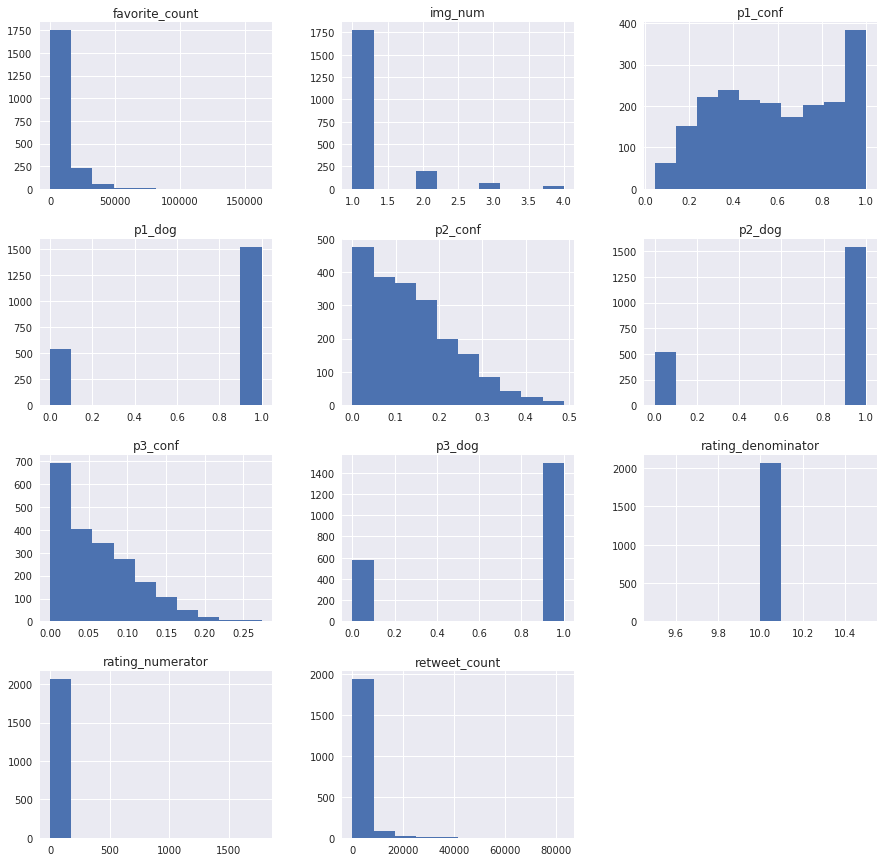

In [265]:
df.hist(figsize=(15,15));

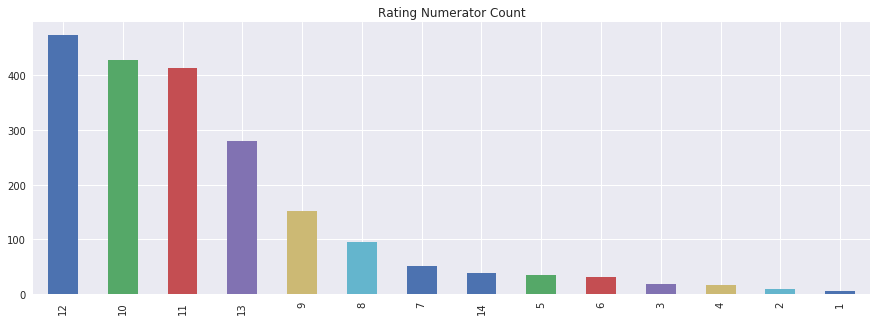

In [266]:
df.rating_numerator.value_counts().nlargest(14).plot(kind='bar',figsize=(15,5),title= 'Rating Numerator Count');


From the bar plot above we can see that the most common rate is 12,10,11,13 .

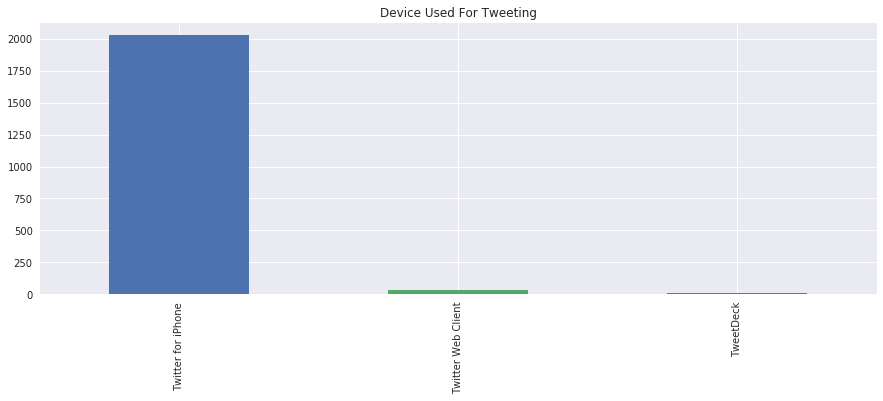

In [267]:
df.source.value_counts().plot(kind='bar',figsize=(15,5),title= 'Device Used For Tweeting');


The vast majority of the tweets from we rate dogs account came from twitter app on the iphone .

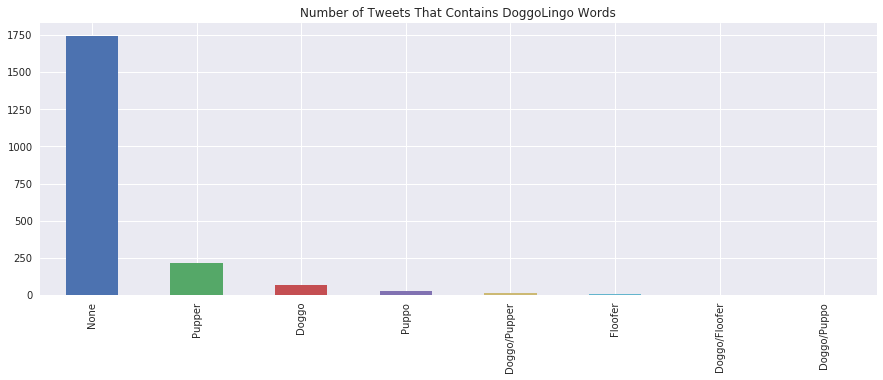

In [268]:
df.DoggoLingo.value_counts().plot(kind='bar',figsize=(15,5),title= 'Number of Tweets That Contains DoggoLingo Words');


The bar plot above indicates that most tweets does not contain any DoggoLingo Words but the most common word is Pupper then Doggo.

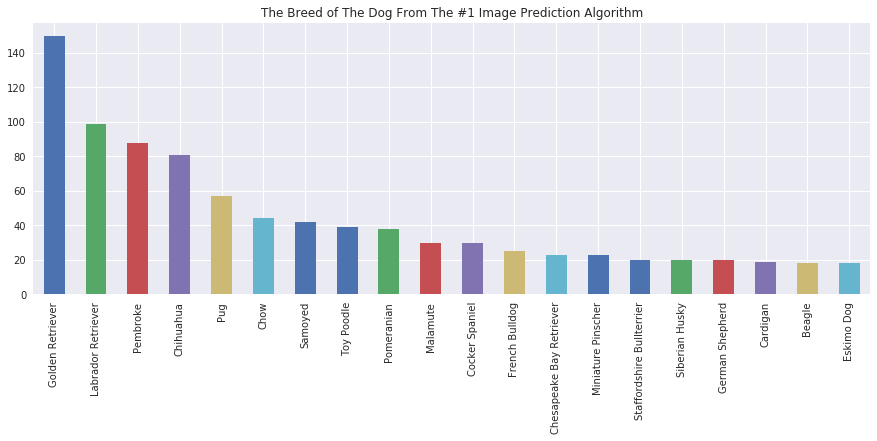

In [269]:
df.query("p1_dog == True").p1.value_counts().nlargest(20).plot(kind='bar',figsize=(15,5),title= 'The Breed of The Dog From The #1 Image Prediction Algorithm');

From the bar plot above we can see that the first image prediction  algorithm gave us the most popular breed of dogs from the tweets is Golden Retriever , Labrador Retriever, Pembroke and Chihuahua.


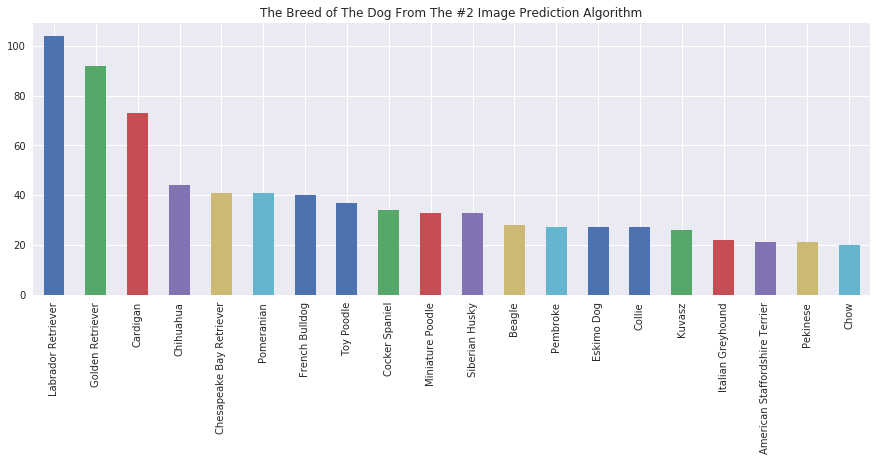

In [270]:
df.query("p2_dog == True").p2.value_counts().nlargest(20).plot(kind='bar',figsize=(15,5),title= 'The Breed of The Dog From The #2 Image Prediction Algorithm');


The 2nd algorithm most popular breed of dogs from the tweets is Labrador Retriever ,Golden Retriever,Cardigan and Chihuahua.

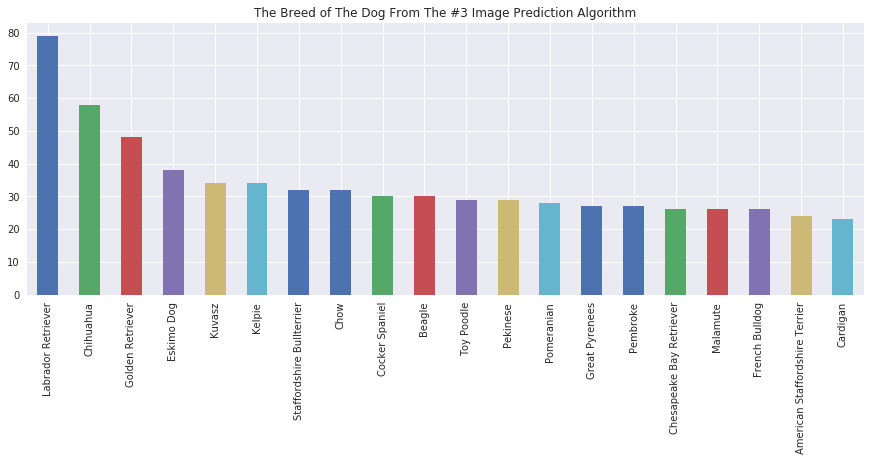

In [271]:
df.query("p3_dog == True").p3.value_counts().nlargest(20).plot(kind='bar',figsize=(15,5),title= 'The Breed of The Dog From The #3 Image Prediction Algorithm');

For the 3nd algorithm, the most popular breed of dogs from the tweets is Labrador Retriever,Chihuahua,Golden Retriever and Eskimo Dog.


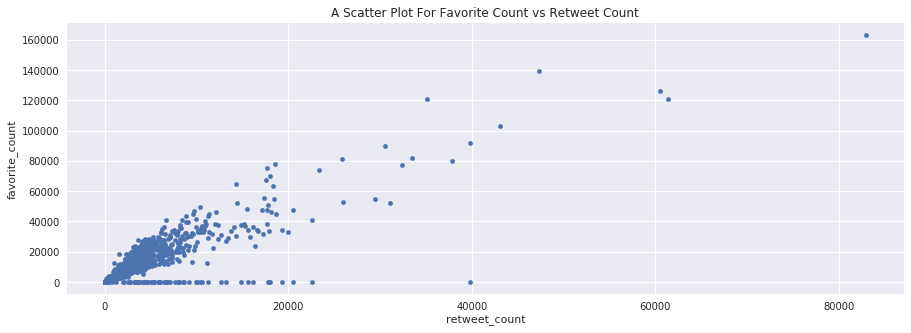

In [272]:
df.plot.scatter('retweet_count', 'favorite_count',figsize=(15,5),title= 'A Scatter Plot For Favorite Count vs Retweet Count');

From the scatter plot above we can see strong positive correlation between and number of retweets and the number of likes.
but lets take a look on when we take tweets with more than a 0 like or retweets count.

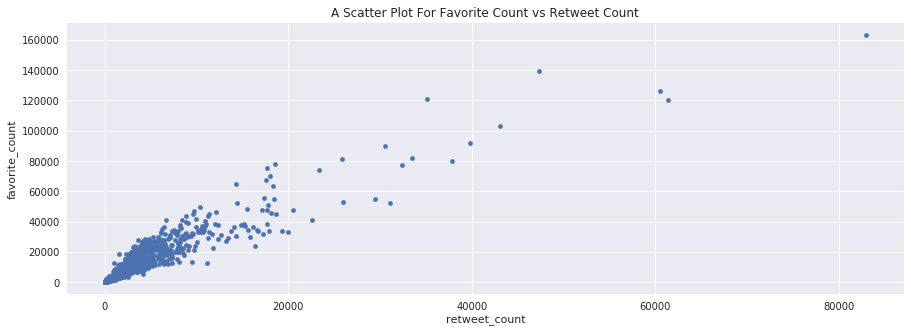

In [273]:
df[df > 0].plot.scatter('retweet_count', 'favorite_count',figsize=(15,5),title= 'A Scatter Plot For Favorite Count vs Retweet Count');

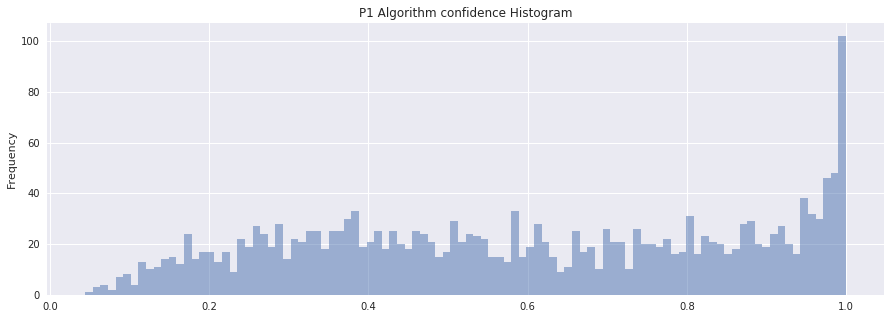

In [274]:
df.p1_conf.plot(kind='hist',figsize=(15,5),bins=100, alpha=0.5,title = 'P1 Algorithm confidence Histogram');


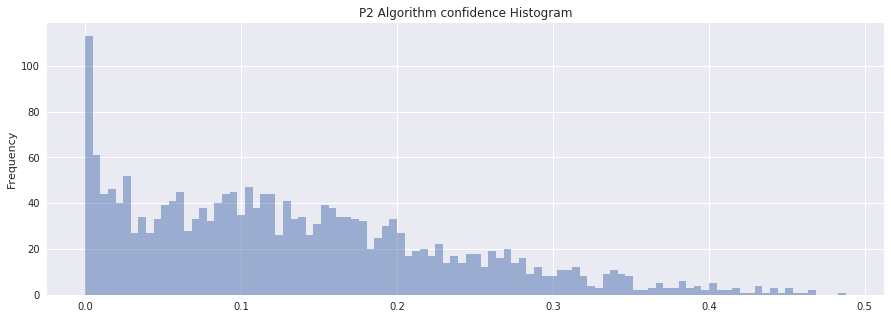

In [275]:
df.p2_conf.plot(kind='hist',figsize=(15,5),bins=100, alpha=0.5,title = 'P2 Algorithm confidence Histogram');


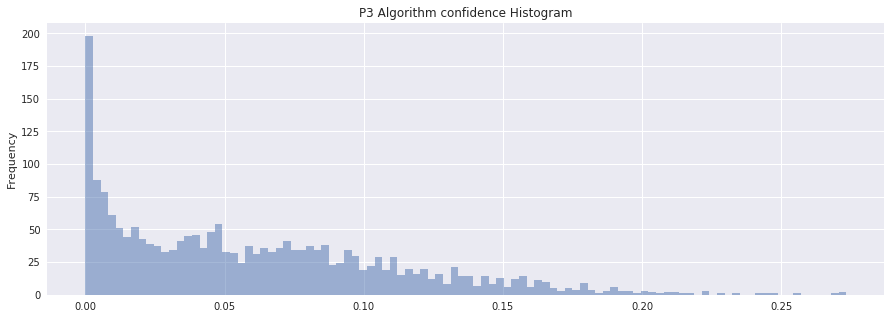

In [276]:
df.p3_conf.plot(kind='hist',figsize=(15,5),bins=100, alpha=0.5,title = 'P3 Algorithm confidence Histogram');


In [277]:
df.p1_conf.mean(),df.p2_conf.mean(),df.p3_conf.mean()

(0.59456779719264286, 0.134671604348167, 0.060341510969782679)

From the Histograms above we can see that P1 Algorithm has the highest confidence mean .

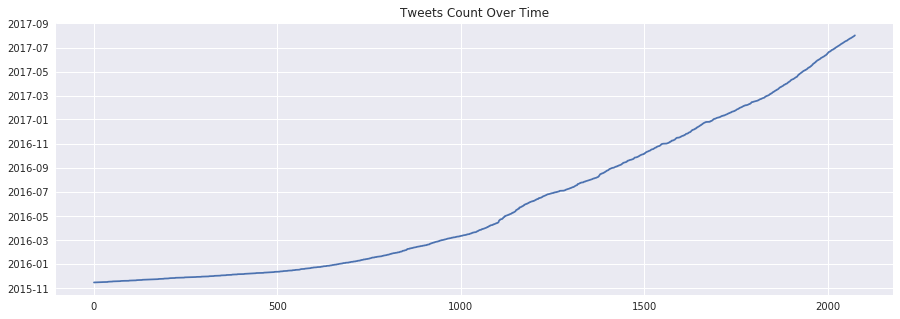

In [278]:
df.timestamp.plot(kind='line',figsize=(15,5),title = 'Tweets Count Over Time');


From the plot above we can see that the tweets count increased over time from 11-2015 to 09-2017.

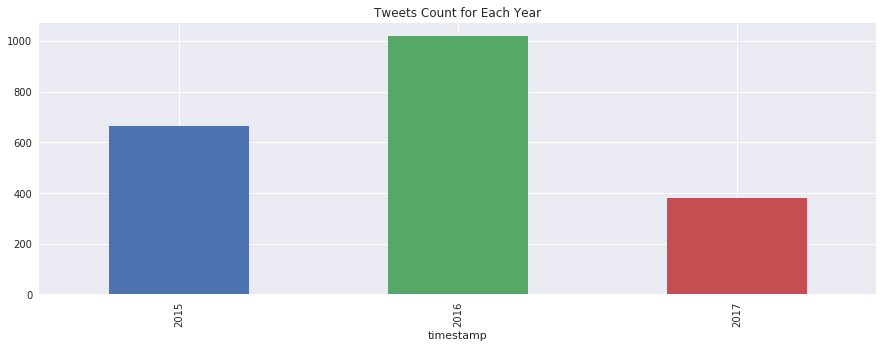

In [279]:
df.groupby(df["timestamp"].dt.year)['tweet_id'].count().plot(kind="bar",figsize=(15,5),title = 'Tweets Count for Each Year');

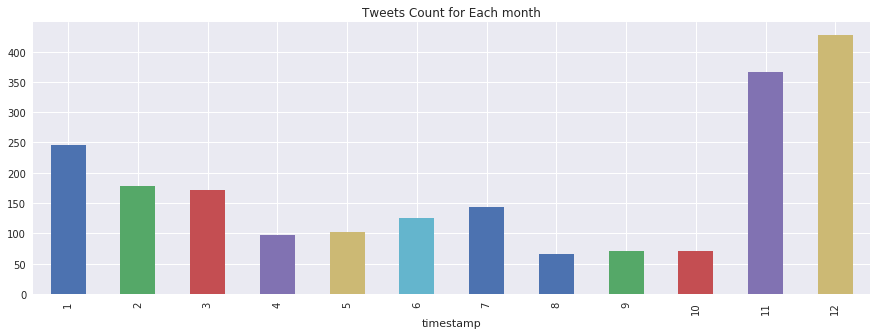

In [280]:
df.groupby(df["timestamp"].dt.month)['tweet_id'].count().plot(kind="bar",figsize=(15,5),title = 'Tweets Count for Each month');

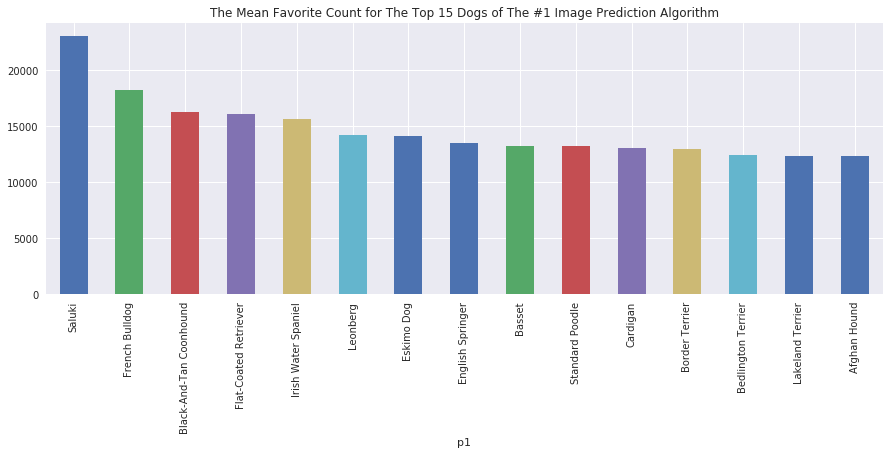

In [281]:
df.query("p1_dog == True").groupby('p1')['favorite_count'].mean().nlargest(15).plot(kind='bar',figsize=(15,5),title= 'The Mean Favorite Count for The Top 15 Dogs of The #1 Image Prediction Algorithm');

Based on the #1 Image Prediction Algorithm the most favourit dogs breed are "Saluki, French Buildog and Black-And-Tan Coonhound".

#### External Links and Sources

- Convert Tweep Oject TO json .
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- Saving Print Output to a Text File.
https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file-in-python-3
- extracting the string between ">" and "<" using str.extract.
https://stackoverflow.com/questions/51831202/extract-substring-between-two-different-characters-using-a-python-regular-expres.
- combine columns without duplicates/ find unique words after combining .
https://stackoverflow.com/questions/44497671/pandas-combine-columns-without-duplicates-find-unique-words-after-combining